当前工作目录: /scratch/work/courses/CHEM-GA-2671-2024fa/students/zz10074/comp-lab-class-2024/Week7-Alphafold/arp-est_Colabfold


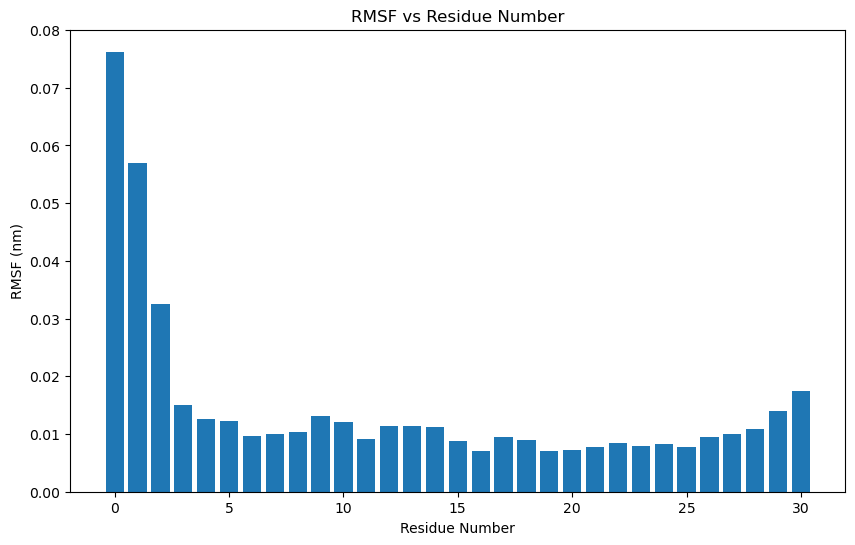

In [8]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# 1. 检查当前工作目录是否正确
print(f"当前工作目录: {os.getcwd()}")  # 确保路径是包含PDB文件的目录

# 2. 找到所有的 PDB 文件
pdb_files = glob.glob("./*.pdb")  # 查找当前目录下的所有PDB文件

# 3. 加载所有的 PDB 文件
trajectories = [md.load(pdb_file) for pdb_file in pdb_files]

# 4. 使用第一个轨迹作为参考，叠加所有轨迹
reference_traj = trajectories[0]
for traj in trajectories[1:]:
    traj.superpose(reference_traj, atom_indices=reference_traj.topology.select('backbone'))

# 5. 合并所有轨迹
merged_traj = md.join(trajectories)

# 6. 计算 RMSF（每个残基的均方根波动）
atom_indices = merged_traj.topology.select('name CA')  # 选择 α-碳原子
rmsf = np.sqrt(np.mean((merged_traj.xyz[:, atom_indices, :] -
                        np.mean(merged_traj.xyz[:, atom_indices, :], axis=0))**2, axis=(0, 2)))

# 7. 获取残基编号
residue_indices = [atom.residue.index for atom in merged_traj.topology.atoms if atom.name == 'CA']

# 8. 绘制 RMSF vs 残基编号的图表
plt.figure(figsize=(10, 6))
plt.bar(residue_indices, rmsf)
plt.xlabel('Residue Number')
plt.ylabel('RMSF (nm)')
plt.title('RMSF vs Residue Number')
plt.show()
